<a href="https://colab.research.google.com/github/272572PPiwnicki/demosaicking/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

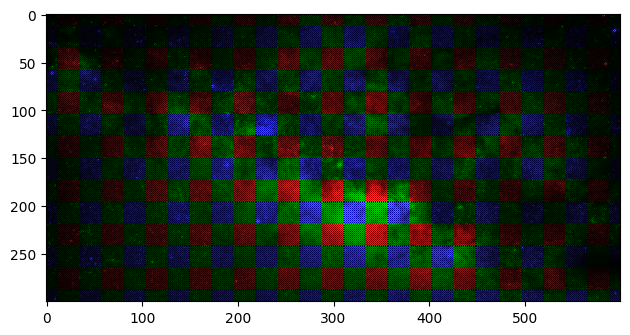

In [5]:
import numpy as np
from scipy import ndimage
from skimage import io
from skimage import transform

image = np.load("milky-way.npy")
io.imshow(image)

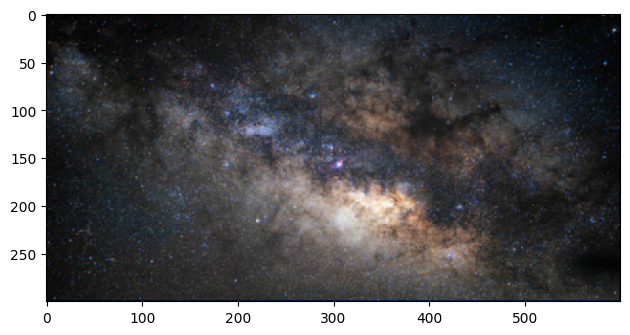

In [6]:
def colors(mask, shape):
    return np.dstack(
        [
            np.tile(mask[canal, :, :], (shape[0] // mask.shape[1], shape[1] // mask.shape[2]))
            for canal in range(mask.shape[0])
        ]
    )

bayer_mask = np.array([[[0, 1], [0, 0]], [[1, 0], [0, 1]], [[0, 0], [1, 0]]], dtype=np.uint8)


filtr_bayer = colors(bayer_mask, shape=image.shape)
sensor = image * filtr_bayer
_ = io.imshow(sensor)

demo_mask = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])
reconstructed = np.dstack([
    ndimage.convolve(sensor[:, :, canal], demo_mask[:, :, canal], mode="constant", cval=0.0)
    for canal in range(3)
])

_ = io.imshow(reconstructed)